In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_excel('weather.xlsx')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Dates
0,8.0,24.3,0.0,3.4,6.3,NW,30,SW,NW,6.0,...,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes,2022-04-01
1,14.0,26.9,3.6,4.4,9.7,ENE,39,E,W,4.0,...,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes,2022-04-02
2,13.7,23.4,3.6,5.8,3.3,NW,85,N,NNE,6.0,...,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes,2022-04-03
3,13.3,15.5,39.8,7.2,9.1,NW,54,WNW,W,30.0,...,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes,2022-04-04
4,7.6,16.1,2.8,5.6,10.6,SSE,50,SSE,ESE,20.0,...,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No,2022-04-05


In [3]:
selected_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']
selected_data = df[selected_columns]

# Compute basic statistics
statistics = selected_data.describe().loc[['mean', '50%', 'std']].rename(index={'50%': 'median'})

# Display the statistics
print("Basic Statistics for MinTemp, MaxTemp, Rainfall, and Evaporation:")
print(statistics)

Basic Statistics for MinTemp, MaxTemp, Rainfall, and Evaporation:
         MinTemp    MaxTemp  Rainfall  Evaporation
mean    7.319945  20.605817  1.411634     4.544044
median  7.500000  19.700000  0.000000     4.200000
std     6.014565   6.710911  4.206843     2.671469


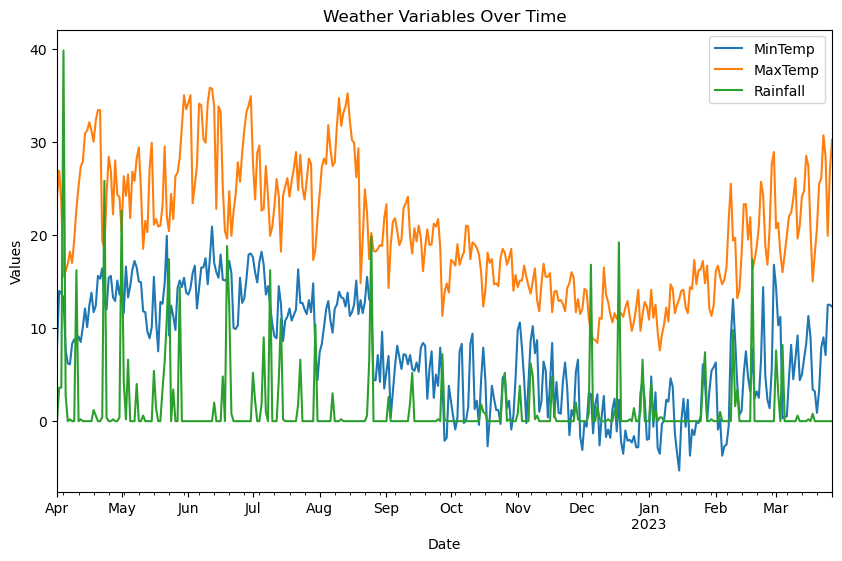

In [4]:
df.set_index('Dates', inplace=True)
df[['MinTemp', 'MaxTemp', 'Rainfall']].plot(figsize=(10, 6))
plt.title('Weather Variables Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

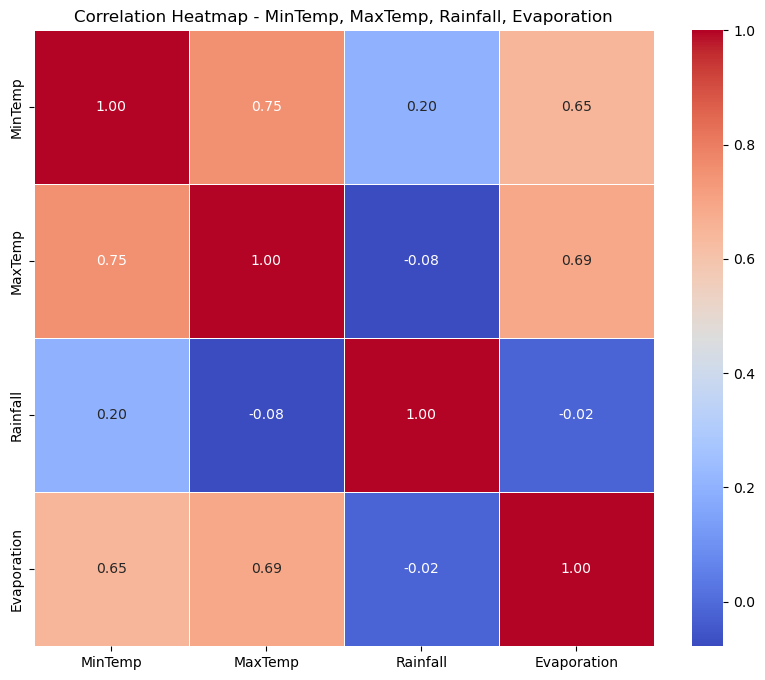

In [5]:
selected_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']
selected_data = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - MinTemp, MaxTemp, Rainfall, Evaporation')
plt.show()

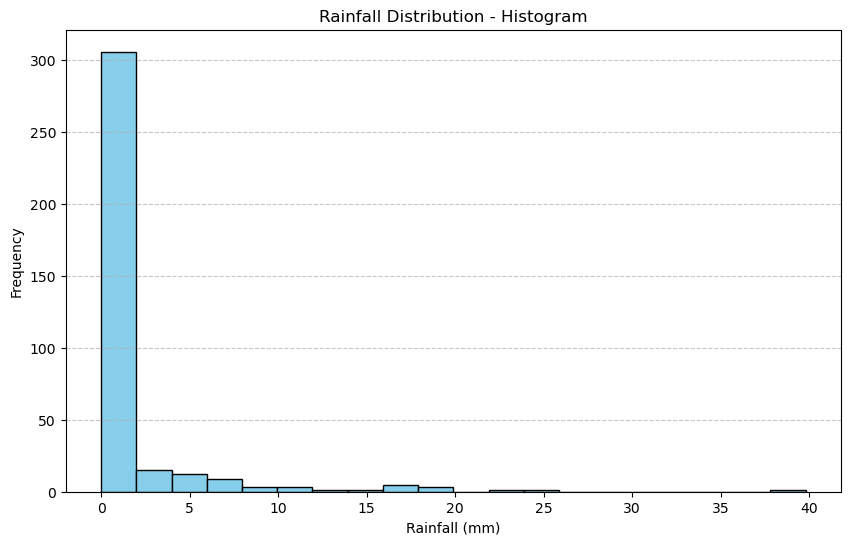

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df["Rainfall"], bins=20, color='skyblue', edgecolor='black')
plt.title('Rainfall Distribution - Histogram')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

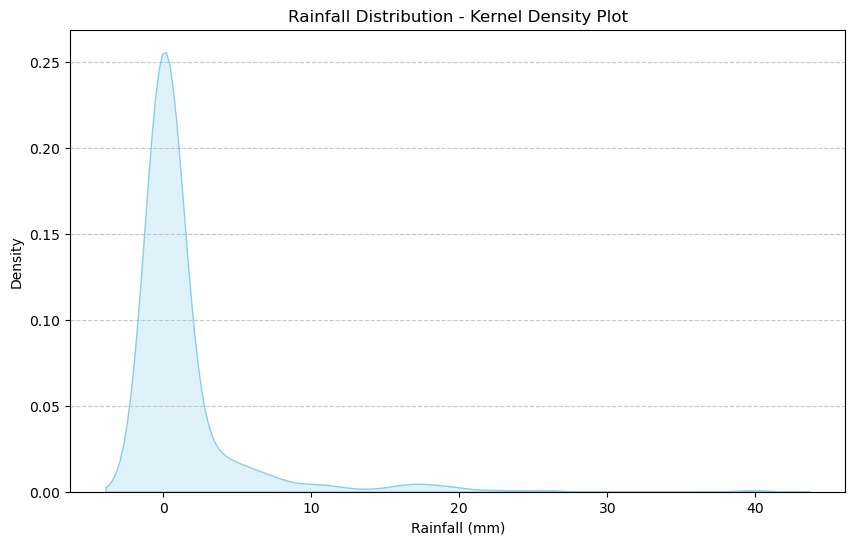

In [7]:
# Plot a kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Rainfall"], fill=True, color='skyblue')
plt.title('Rainfall Distribution - Kernel Density Plot')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

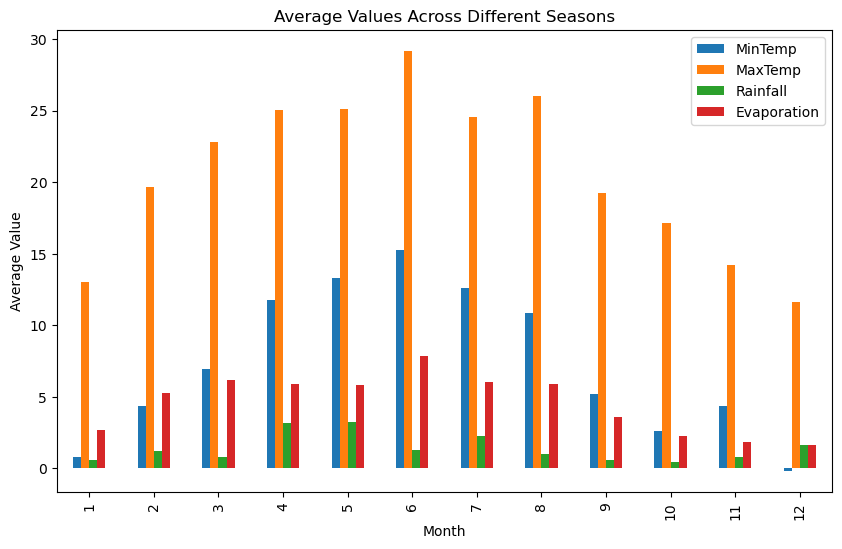

In [8]:
# Seasonal Analysis
# Assuming you have a 'Season' column
# You may need to create this column based on the date in your dataset
seasonal_avg = df.groupby(df.index.month)[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']].mean()
seasonal_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average Values Across Different Seasons')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.show()